In [2]:
import pandas as pd

**Collection of Data**

In [3]:
legitimate_urls = pd.read_csv("extracted_legitimate_urls.csv")
phishing_urls = pd.read_csv("extracted_phishing_urls.csv")

In [4]:
print(legitimate_urls.head(10))
print(phishing_urls.head(10))

  Protocol                    Domain                              Path  \
0     http  www.liquidgeneration.com                                 /   
1     http       www.ceres.dti.ne.jp       /~nekoi/senno/senfirst.html   
2     http            www.galeon.com                             /kmh/   
3     http       www.fanworkrecs.com                                 /   
4     http            www2.117.ne.jp             /~mb1996ax/enadc.html   
5     http          archive.rhps.org          /fritters/yui/index.html   
6     http           www.cutepet.org                                 /   
7     http    www.taremeparadise.com                                 /   
8     http      www.internetdump.com  /users/pornographite/index1.html   
9     http          darkkaminari.net                               NaN   

   Having_IP  URL_Length  Having_@_symbol  Redirection_//_symbol  \
0          0           0                0                      0   
1          0           0                0        

## Data PreProcessing
#### Data is in two data frames so we merge them to make one dataframe
Note: two dataframes has same column names

In [5]:
urls = legitimate_urls.append(phishing_urls)
urls

,Protocol,Domain,Path,Having_IP,URL_Length,Having_@_symbol,Redirection_//_symbol,Prefix_suffix_separation,Sub_domains,tiny_url,web_traffic,domain_registration_length,dns_record,statistical_report,age_domain,http_tokens,label
0,http,www.liquidgeneration.com,/,0,0,0,0,0,0,0,1,1,1,1,1,0,0
1,http,www.ceres.dti.ne.jp,/~nekoi/senno/senfirst.html,0,0,0,0,0,1,0,0,1,1,0,1,0,0
2,http,www.galeon.com,/kmh/,0,0,0,0,0,0,0,0,1,1,0,1,0,0
3,http,www.fanworkrecs.com,/,0,0,0,0,0,0,0,1,1,1,1,1,0,0
4,http,www2.117.ne.jp,/~mb1996ax/enadc.html,0,0,0,0,0,1,0,1,1,1,0,1,0,0
5,http,archive.rhps.org,/fritters/yui/index.html,0,0,0,0,0,2,0,1,1,1,0,1,0,0
6,http,www.cutepet.org,/,0,0,0,0,0,0,0,1,1,1,1,1,0,0
7,http,www.taremeparadise.com,/,0,0,0,0,0,0,0,1,1,1,1,1,0,0
8,http,www.internetdump.com,/users/pornographite/index1.html,0,2,0,0,0,2,0,1,1,1,1,1,0,0
9,http,darkkaminari.net,NaN,0,0,0,0,0,0,0,1,1,1,1,1,0,0


In [6]:
urls.head(5)

,Protocol,Domain,Path,Having_IP,URL_Length,Having_@_symbol,Redirection_//_symbol,Prefix_suffix_separation,Sub_domains,tiny_url,web_traffic,domain_registration_length,dns_record,statistical_report,age_domain,http_tokens,label
0,http,www.liquidgeneration.com,/,0,0,0,0,0,0,0,1,1,1,1,1,0,0
1,http,www.ceres.dti.ne.jp,/~nekoi/senno/senfirst.html,0,0,0,0,0,1,0,0,1,1,0,1,0,0
2,http,www.galeon.com,/kmh/,0,0,0,0,0,0,0,0,1,1,0,1,0,0
3,http,www.fanworkrecs.com,/,0,0,0,0,0,0,0,1,1,1,1,1,0,0
4,http,www2.117.ne.jp,/~mb1996ax/enadc.html,0,0,0,0,0,1,0,1,1,1,0,1,0,0


In [15]:
urls.shape[1]

14

In [8]:
urls.columns

Index(['Protocol', 'Domain', 'Path', 'Having_IP', 'URL_Length',
       'Having_@_symbol', 'Redirection_//_symbol', 'Prefix_suffix_separation',
       'Sub_domains', 'tiny_url', 'web_traffic', 'domain_registration_length',
       'dns_record', 'statistical_report', 'age_domain', 'http_tokens',
       'label'],
      dtype='object')

#### Removing Unnecessary columns

In [9]:
urls = urls.drop(urls.columns[[0,1,2]],axis=1)

#### Since we merged two dataframes top 900 rows will have legitimate urls and bottom 900 rows will have phishing urls. So if we split the data now and create a model for it will overfit so we need to shuffle the rows before splitting the data into training set and test set

In [10]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
urls = urls.sample(frac=1).reset_index(drop=True)

#### Removing class variable from the dataset

In [11]:
urls_without_labels = urls.drop('label',axis=1)
urls_without_labels.columns
labels = urls['label']


#### splitting the data into train data and test data

Dividing the data in the ratio of 70:30 [train_data:test_data]

In [12]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.30, random_state=110)

In [14]:
print(len(data_train),len(data_test),len(labels_train),len(labels_test))

1382 593 1382 593


#### checking the split of labels in train and test data

The split should be in equal proportion for both classes

Phishing - 1

Legitimate - 0


In [16]:
#initially checking the split of labels_train data 
labels_train.value_counts()


0    701
1    681
Name: label, dtype: int64

By above results it is shown that the split of both classes are almost equal!

Testing the same for labels of test data also

In [17]:
#checking the split for labels_test data
labels_test.value_counts()

1    312
0    281
Name: label, dtype: int64

as the split is almost in equal proportion we can train the model

#### Creating the model and fitting the data into the model

creating the model with default parameters

In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

In [19]:
random_forest_classifier.fit(data_train,labels_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predicting the result for test data

In [20]:
prediction_label = random_forest_classifier.predict(data_test)

#### Creating confusion matrix and checking the accuracy

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusionMatrix = confusion_matrix(labels_test,prediction_label)
print(confusionMatrix)
accuracy_score(labels_test,prediction_label)

[[237  44]
 [ 86 226]]


0.7807757166947723

## Feature Importance Plot

indices of columns : [ 1  7 10  4  5  6  0  3  2 12 11  9  8]

 ***Feature ranking: *** 

Feature name : Importance
1 URL_Length   :  0.28105739530236756 

2 web_traffic   :  0.27786137865590677 

3 statistical_report   :  0.16619163935306838 

4 Prefix_suffix_separation   :  0.10786023621832422 

5 Sub_domains   :  0.07046494281967404 

6 tiny_url   :  0.06308043337999766 

7 Having_IP   :  0.011481020128080664 

8 Redirection_//_symbol   :  0.01108138337376169 

9 Having_@_symbol   :  0.009175359855708652 

10 http_tokens   :  0.0017462109131104156 

11 age_domain   :  0.0 

12 dns_record   :  0.0 

13 domain_registration_length   :  0.0 

**** The red bars are the feature importances of the randomforest classifier, along with their inter-trees variability*****


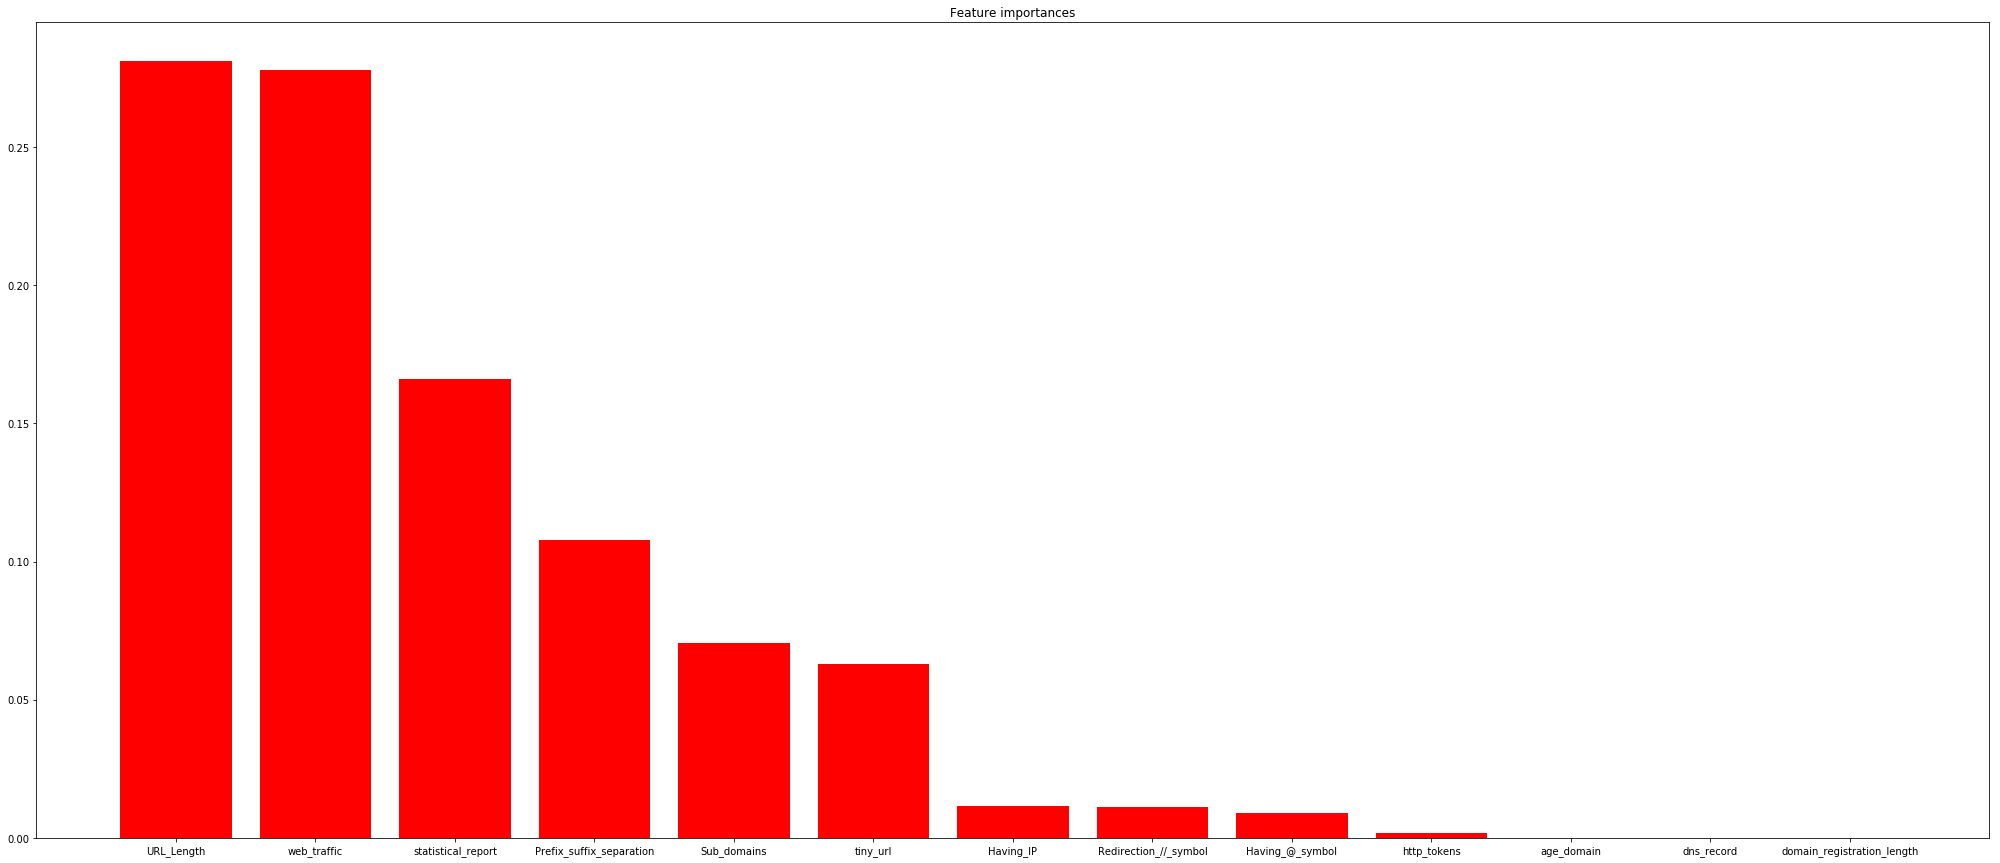

In [24]:
import matplotlib.pyplot as plt
import numpy as np

#feature_importances_ : array of shape = [n_features] ------ The feature importances (the higher, the more important the feature).

#feature_importances_  -- This method returns the quantified relative importance in the order the features were fed to the algorithm

importances = random_forest_classifier.feature_importances_

#std = np.std([tree.feature_importances_ for tree in random_forest_classifier.estimators_],axis=0)   #[[[estimators_ :explaination ---  list of DecisionTreeClassifier ----- (The collection of fitted sub-estimators.)]]]

#To make the plot pretty, we’ll instead sort the features from most to least important.
indices = np.argsort(importances)[::-1] 
print(f"indices of columns : {indices}")

# Print the feature ranking
print("\n ***Feature ranking: *** \n")
print("Feature name : Importance")

for f in range(data_train.shape[1]):
    print(f"{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} \n")
    
print("**** The red bars are the feature importances of the randomforest classifier, along with their inter-trees variability*****")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_train.shape[1]), importances[indices],
       color="r", align="center")   
#yerr=std[indices] -- this is another parameter that can be included if std is calculated above
#and also it gives error bar that's the reason we calculate std above. but here we are not making it plot.

plt.xticks(range(data_train.shape[1]), data_train.columns[indices])
plt.xlim([-1, data_train.shape[1]])

plt.rcParams['figure.figsize'] = (35,15)  #this will increase the size of the plot
plt.show()